## https://ithelp.ithome.com.tw/articles/10249694
## https://medium.com/%E5%B7%A5%E7%A8%8B%E9%9A%A8%E5%AF%AB%E7%AD%86%E8%A8%98/5%E7%A8%AE%E6%8A%93%E5%8F%96%E5%8F%B0%E8%82%A1%E6%AD%B7%E5%8F%B2%E8%82%A1%E5%83%B9%E7%9A%84%E6%96%B9%E6%B3%95-766bf2ed9d6

### https://www.twse.com.tw/zh/page/trading/exchange/STOCK_DAY.html
### https://www.tpex.org.tw/web/stock/aftertrading/daily_trading_info/st43.php?l=zh-tw



In [6]:
import pandas as pd
import requests, json

from datetime import datetime
from dateutil.relativedelta import relativedelta

In [4]:
date = '20210101'
stock_no = '0050'

html = requests.get('https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=%s&stockNo=%s' % (date,stock_no))
content = json.loads(html.text)
stock_data = content['data']
col_name = content['fields']

df = pd.DataFrame(data=stock_data, columns=col_name)
df.head()

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,111/01/03,"7,064,552","1,034,974,917",146.00,147.35,146.00,146.40,+0.90,"8,298"
1,111/01/04,"10,122,789","1,507,398,153",147.70,149.60,147.70,149.60,+3.20,"10,438"
2,111/01/05,"11,730,618","1,755,680,824",150.10,150.55,149.10,149.30,-0.30,"12,614"
3,111/01/06,"9,085,138","1,342,084,958",148.30,148.75,147.00,147.90,-1.40,"13,496"
4,111/01/07,"7,435,645","1,095,365,963",148.30,149.00,146.50,146.60,-1.30,"12,008"


In [5]:
df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,111/01/03,"7,064,552","1,034,974,917",146.00,147.35,146.00,146.40,+0.90,"8,298"
1,111/01/04,"10,122,789","1,507,398,153",147.70,149.60,147.70,149.60,+3.20,"10,438"
2,111/01/05,"11,730,618","1,755,680,824",150.10,150.55,149.10,149.30,-0.30,"12,614"
3,111/01/06,"9,085,138","1,342,084,958",148.30,148.75,147.00,147.90,-1.40,"13,496"
4,111/01/07,"7,435,645","1,095,365,963",148.30,149.00,146.50,146.60,-1.30,"12,008"
5,111/01/10,"15,979,639","2,346,043,879",146.00,147.80,145.40,147.55,+0.95,"8,675"
6,111/01/11,"17,984,061","2,655,717,032",147.60,148.50,146.70,148.30,+0.75,"8,365"
7,111/01/12,"10,326,119","1,541,003,375",149.35,149.60,148.70,149.55,+1.25,"6,551"
8,111/01/13,"7,680,333","1,152,220,355",149.55,150.45,149.55,150.30,+0.75,"7,281"
9,111/01/14,"10,400,081","1,560,843,189",150.80,151.20,149.05,150.30,0.00,"9,178"


In [14]:
date_start = datetime(2010, 1, 1, 0, 0, 0)
date_new = date_start + relativedelta(months=+1)

date_time = date_new.strftime("%Y%m%d")
print(date_time)

20100201


In [19]:
def getStock(date,stock_no):
    #date = '20220101'
    #stock_no = '0050'

    html = requests.get('https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=%s&stockNo=%s' % (date,stock_no))
    content = json.loads(html.text)
    stock_data = content['data']
    col_name = content['fields']
    return col_name, stock_data


date_start = datetime(2010, 1, 1, 0, 0, 0)
stock_no = '0050'
allData = []
for i in range(2):
    date = date_start + relativedelta(months = i)
    date_string = date.strftime("%Y%m%d")
    print(date_string)
    col_name, stock_data = getStock(date_string, stock_no)
    allData.append(stock_data)
    
print(allData)
    #df = pd.DataFrame(data=stock_data, columns=col_name)
    #df.head()

20100101
20100201
[[[' 99/01/04', '20,083,125', '1,132,155,005', '56.45', '56.65', '56.05', '56.50', '+0.05', '1,624'], [' 99/01/05', '16,453,854', '932,015,376', '56.80', '56.90', '56.15', '56.50', ' 0.00', '1,866'], [' 99/01/06', '19,012,172', '1,087,143,829', '56.50', '57.75', '56.50', '57.55', '+1.05', '2,958'], [' 99/01/07', '14,110,575', '814,344,344', '57.60', '58.15', '57.30', '57.40', '-0.15', '1,846'], [' 99/01/08', '11,342,752', '651,830,965', '57.30', '57.75', '57.05', '57.75', '+0.35', '1,493'], [' 99/01/11', '11,581,081', '670,025,579', '57.10', '58.05', '57.10', '57.90', '+0.15', '1,636'], [' 99/01/12', '7,306,217', '420,473,484', '57.55', '57.85', '57.25', '57.60', '-0.30', '1,329'], [' 99/01/13', '16,686,518', '948,986,977', '57.05', '57.15', '56.70', '56.75', '-0.85', '2,021'], [' 99/01/14', '9,978,365', '570,406,499', '56.80', '57.60', '56.80', '57.45', '+0.70', '1,208'], [' 99/01/15', '8,425,543', '485,743,844', '57.35', '57.95', '57.35', '57.80', '+0.35', '1,020'],

In [23]:
flat_list = [item for sublist in allData for item in sublist]
len(flat_list)
df = pd.DataFrame(data=flat_list, columns=col_name)
#df.head()
df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,99/01/04,"20,083,125","1,132,155,005",56.45,56.65,56.05,56.50,+0.05,"1,624"
1,99/01/05,"16,453,854","932,015,376",56.80,56.90,56.15,56.50,0.00,"1,866"
2,99/01/06,"19,012,172","1,087,143,829",56.50,57.75,56.50,57.55,+1.05,"2,958"
3,99/01/07,"14,110,575","814,344,344",57.60,58.15,57.30,57.40,-0.15,"1,846"
4,99/01/08,"11,342,752","651,830,965",57.30,57.75,57.05,57.75,+0.35,"1,493"
5,99/01/11,"11,581,081","670,025,579",57.10,58.05,57.10,57.90,+0.15,"1,636"
6,99/01/12,"7,306,217","420,473,484",57.55,57.85,57.25,57.60,-0.30,"1,329"
7,99/01/13,"16,686,518","948,986,977",57.05,57.15,56.70,56.75,-0.85,"2,021"
8,99/01/14,"9,978,365","570,406,499",56.80,57.60,56.80,57.45,+0.70,"1,208"
9,99/01/15,"8,425,543","485,743,844",57.35,57.95,57.35,57.80,+0.35,"1,020"


In [47]:
date = '106/01'
stock_no = '00679B'

#tpex_url = 'https://www.tpex.org.tw/web/stock/aftertrading/daily_trading_info/st43_result.php?l=zh-tw&d=106/03&stkno=00679B'

#html = requests.get('https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date=%s&stockNo=%s' % (date,stock_no))
html = requests.get('https://www.tpex.org.tw/web/stock/aftertrading/daily_trading_info/st43_result.php?l=zh-tw&d=%s&stkno=%s' %  (date,stock_no) )
#html = requests.get(tpex_url)
content = json.loads(html.text)
stock_data = content['aaData']
col_name = ['日期','成交仟股','成交仟元','開盤','最高','最低','收盤','漲跌','筆數']
df = pd.DataFrame(data=stock_data, columns=col_name)
#df.head()
df


,日期,成交仟股,成交仟元,開盤,最高,最低,收盤,漲跌,筆數
0,106/01/17＊,928,"36,833",39.70,39.78,39.51,39.69,0.13,225
1,106/01/18,601,"23,856",39.66,39.72,39.65,39.65,-0.04,114
2,106/01/19,"1,001","39,362",39.50,39.50,39.26,39.35,-0.30,102
3,106/01/20,261,"10,177",39.05,39.06,38.92,38.92,-0.43,73
4,106/01/23,338,"13,172",38.93,38.99,38.88,38.88,-0.04,39
5,106/01/24,861,"33,637",39.07,39.11,39.02,39.09,0.21,85


In [60]:
#抓取上櫃中心的股價

def getStock_tpex(date,stock_no):

    #date = '106/01'
    #stock_no = '00679B'

    html = requests.get('https://www.tpex.org.tw/web/stock/aftertrading/daily_trading_info/st43_result.php?l=zh-tw&d=%s&stkno=%s' %  (date,stock_no) )
    content = json.loads(html.text)
    stock_data = content['aaData']
    
    return stock_data
    #df = pd.DataFrame(data=stock_data, columns=col_name)
    #df.head()
    #df

stock_no = '00679B'
col_name = ['日期','成交仟股','成交仟元','開盤','最高','最低','收盤','漲跌','筆數']    
date_start = datetime(2017, 1, 1, 0, 0, 0)
allData = []
for i in range(12*5+1):
    date_new = date_start + relativedelta(months = i)

    #西元轉民國
    year = date_new.strftime("%Y")
    month = date_new.strftime("%m")
    
    year = str(int(year)-1911)
    date_string = year+'/'+month
    print(date_string)
    stock_data = getStock_tpex(date_string, stock_no)
    allData.append(stock_data)

    
flat_list = [item for sublist in allData for item in sublist]
df = pd.DataFrame(data=flat_list, columns=col_name)
#df.head()
df    

106/01
106/02
106/03
106/04
106/05
106/06
106/07
106/08
106/09
106/10
106/11
106/12
107/01
107/02
107/03
107/04
107/05
107/06
107/07
107/08
107/09
107/10
107/11
107/12
108/01
108/02
108/03
108/04
108/05
108/06
108/07
108/08
108/09
108/10
108/11
108/12
109/01
109/02
109/03
109/04
109/05
109/06
109/07
109/08
109/09
109/10
109/11
109/12
110/01
110/02
110/03
110/04
110/05
110/06
110/07
110/08
110/09
110/10
110/11
110/12
111/01


,日期,成交仟股,成交仟元,開盤,最高,最低,收盤,漲跌,筆數
0,106/01/17＊,928,"36,833",39.70,39.78,39.51,39.69,0.13,225
1,106/01/18,601,"23,856",39.66,39.72,39.65,39.65,-0.04,114
2,106/01/19,"1,001","39,362",39.50,39.50,39.26,39.35,-0.30,102
3,106/01/20,261,"10,177",39.05,39.06,38.92,38.92,-0.43,73
4,106/01/23,338,"13,172",38.93,38.99,38.88,38.88,-0.04,39
5,106/01/24,861,"33,637",39.07,39.11,39.02,39.09,0.21,85
6,106/02/02,639,"24,503",38.36,38.37,38.28,38.37,-0.72,54
7,106/02/03,"1,286","49,040",38.18,38.19,38.09,38.13,-0.24,87
8,106/02/06,833,"31,631",38.01,38.01,37.90,37.96,-0.17,78
9,106/02/07,399,"15,302",38.27,38.37,38.25,38.34,0.38,53


In [113]:
df.dtypes

日期       object
成交仟股    float64
成交仟元     object
開盤       object
最高       object
最低       object
收盤      float64
漲跌       object
筆數       object
dtype: object

In [97]:
df['收盤'] = df['收盤'].astype(float)

In [112]:
df['成交仟股'] = df['成交仟股'].str.replace(',', '').astype(int)


In [117]:
df['成交仟元'] = df['成交仟元'].str.replace(',', '').astype(int)


In [122]:
df['日期'] = df['日期'].str.replace('＊', '')

In [119]:
cols = df.columns[df.dtypes.eq('object')]
cols

Index(['日期', '開盤', '最高', '最低', '漲跌', '筆數'], dtype='object')

In [123]:
df

,日期,成交仟股,成交仟元,開盤,最高,最低,收盤,漲跌,筆數
0,106/01/17,928,36833,39.70,39.78,39.51,39.69,0.13,225
1,106/01/18,601,23856,39.66,39.72,39.65,39.65,-0.04,114
2,106/01/19,1001,39362,39.50,39.50,39.26,39.35,-0.30,102
3,106/01/20,261,10177,39.05,39.06,38.92,38.92,-0.43,73
4,106/01/23,338,13172,38.93,38.99,38.88,38.88,-0.04,39
5,106/01/24,861,33637,39.07,39.11,39.02,39.09,0.21,85
6,106/02/02,639,24503,38.36,38.37,38.28,38.37,-0.72,54
7,106/02/03,1286,49040,38.18,38.19,38.09,38.13,-0.24,87
8,106/02/06,833,31631,38.01,38.01,37.90,37.96,-0.17,78
9,106/02/07,399,15302,38.27,38.37,38.25,38.34,0.38,53


In [98]:
import matplotlib.pyplot as plt

In [99]:
df['收盤'].max()

54.1

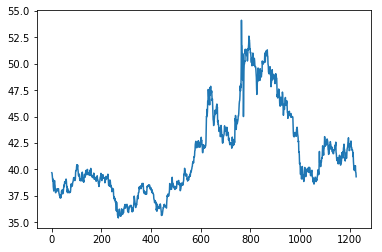

In [124]:


plt.plot(df['收盤'])